## Rice leaf prediction

This dataset contains 119 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

-Leaf smut

-Brown spot

-Bacterial leaf blight


In this project we will classify the picture to 3 classes

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential

In [52]:
model= Sequential()

In [53]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation

model.add(Conv2D(32, (3,3), input_shape=(250,250,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


In [54]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())

In [55]:
from tensorflow.keras.layers import Dense, Dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(3))
model.add(Activation('softmax'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 16)      4624      
                                                                 
 activation_6 (Activation)   (None, 122, 122, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                  

In [57]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics=['accuracy']
)

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=5,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale= 1/255
)

In [60]:
batch_size = 10

In [61]:
train_generator = train_datagen.flow_from_directory(
    'Data/train/',
    target_size= (250, 250),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Data/test/',
    target_size= (250, 250),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 107 images belonging to 3 classes.
Found 12 images belonging to 1 classes.


In [62]:
model.fit(
     train_generator,
    steps_per_epoch=107//batch_size,
    epochs=22,
    validation_data=test_generator,
    validation_steps=12//batch_size
)

Epoch 1/22
10/10 [==============================] - 15s 1s/step - loss: 1.8628 - accuracy: 0.2900 - val_loss: 3.3448 - val_accuracy: 0.9000
Epoch 2/22
10/10 [==============================] - 11s 1s/step - loss: 1.0901 - accuracy: 0.4639 - val_loss: 3.3390 - val_accuracy: 0.5000
Epoch 3/22
10/10 [==============================] - 11s 1s/step - loss: 1.0462 - accuracy: 0.5155 - val_loss: 3.4025 - val_accuracy: 0.5000
Epoch 4/22
10/10 [==============================] - 11s 1s/step - loss: 1.1448 - accuracy: 0.3814 - val_loss: 3.3046 - val_accuracy: 0.9000
Epoch 5/22
10/10 [==============================] - 11s 1s/step - loss: 1.0423 - accuracy: 0.4742 - val_loss: 3.5961 - val_accuracy: 0.7000
Epoch 6/22
10/10 [==============================] - 11s 1s/step - loss: 0.9829 - accuracy: 0.5876 - val_loss: 3.5646 - val_accuracy: 0.4000
Epoch 7/22
10/10 [==============================] - 12s 1s/step - loss: 0.9110 - accuracy: 0.5361 - val_loss: 3.7862 - val_accuracy: 0.5000
Epoch 8/22
10/10 [==

In [63]:
model.save_weights('my_weights.h5')

In [64]:
model.load_weights('my_weights.h5')

## The prediction is given according to 
### 0= Bacterial leaf blight disease
### 1= Brown spot disease
### 2= Leaf smut disease

### Example 1

In [65]:
image_name = 'leaf_smut3.jpg'

In [66]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img(image_name)
x = img_to_array(img.resize([250,250]))
x = x.reshape((1,) + x.shape)

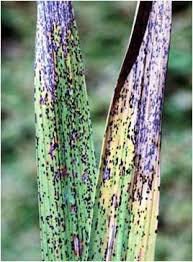

In [67]:
img

In [68]:
model.predict(x)

array([[0., 0., 1.]], dtype=float32)

In [69]:
import numpy as np

In [70]:
np.argmax(model.predict(x))

2

### Example 2

In [86]:
image_name2='brown_spot5.jpg'

In [87]:

img2 = load_img(image_name2)
x2 = img_to_array(img2.resize([250,250]))
x2 = x2.reshape((1,) + x2.shape)

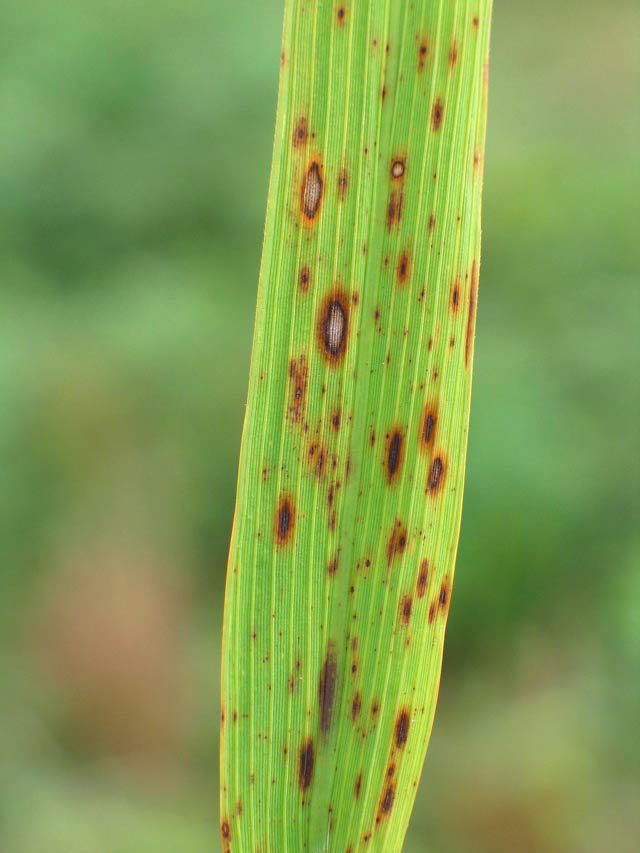

In [88]:
img2

In [89]:
model.predict(x2)

array([[0., 1., 0.]], dtype=float32)

In [90]:
np.argmax(model.predict(x2))

1

### Example 3

In [76]:
image_name3='leaf_smut.jpg'

In [77]:

img3 = load_img(image_name3)
x3 = img_to_array(img3.resize([250,250]))
x3 = x2.reshape((1,) + x3.shape)

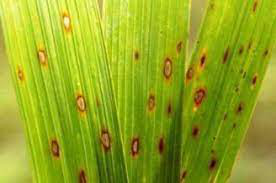

In [78]:
img3

In [79]:
model.predict(x3)

array([[0., 1., 0.]], dtype=float32)

In [80]:
np.argmax(model.predict(x3))

1

## Example 4

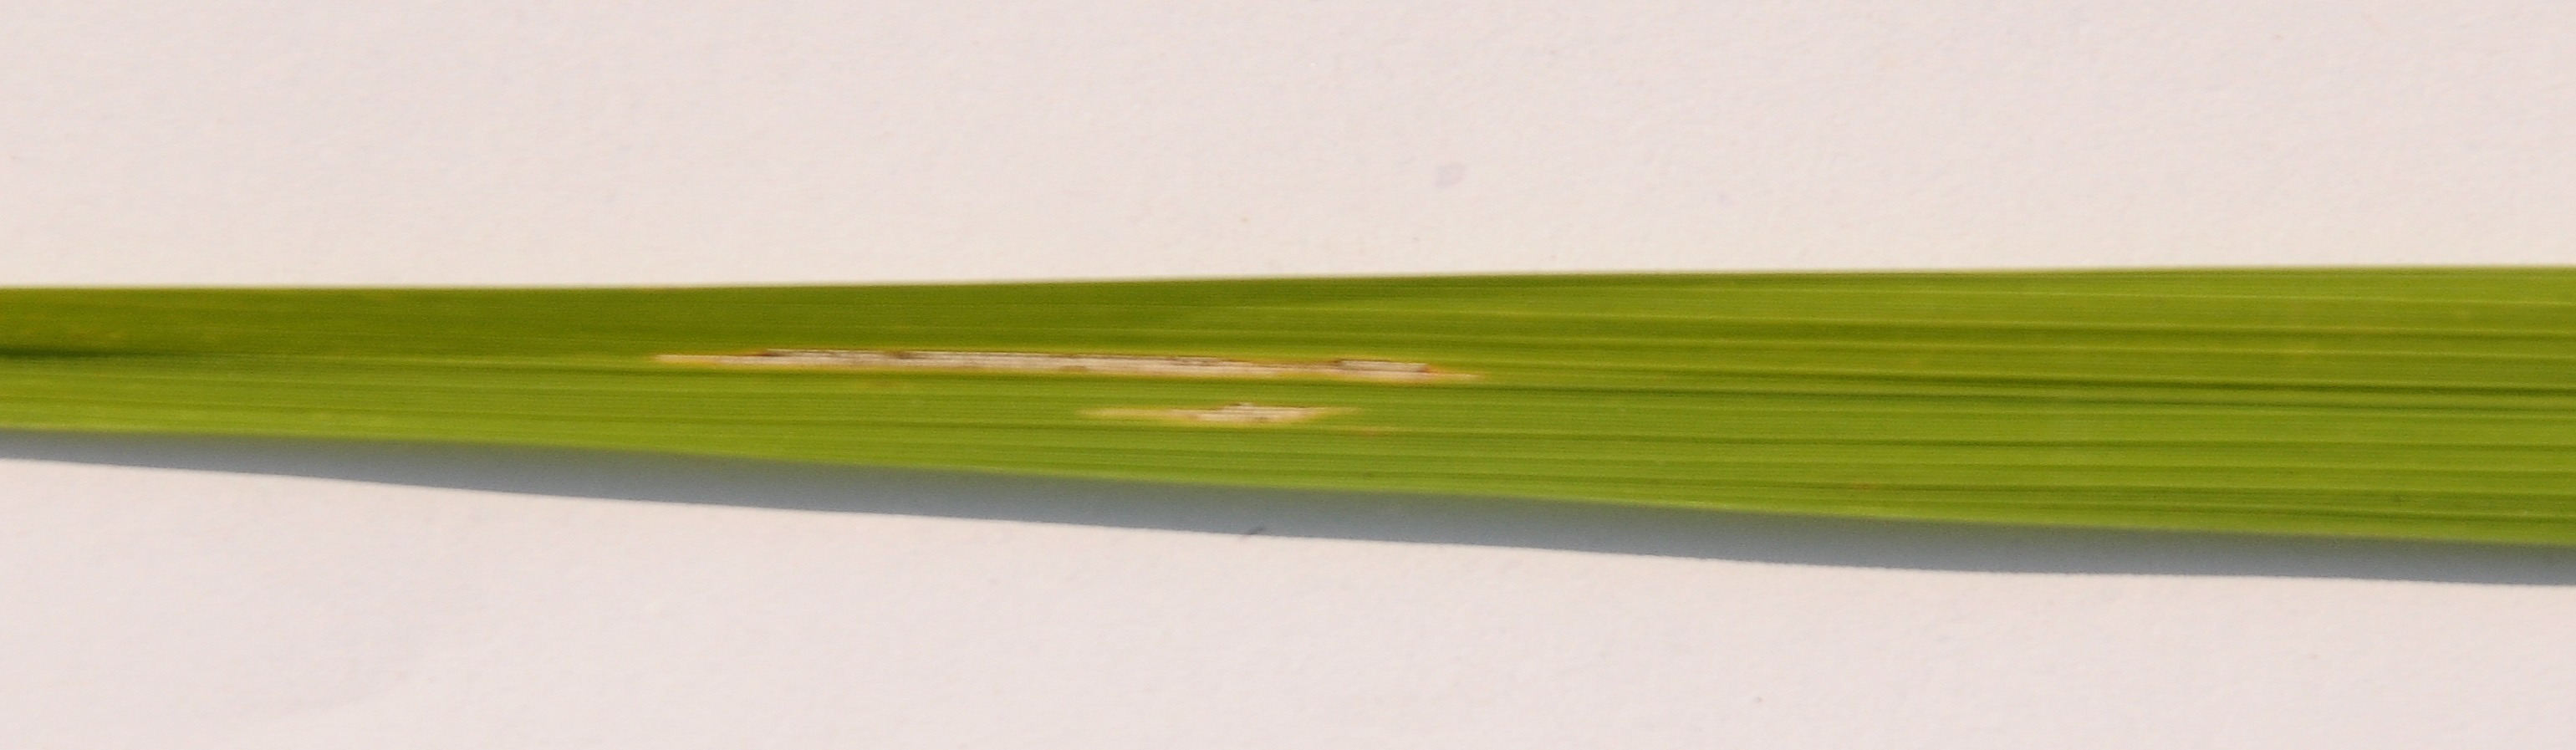

In [95]:
image_name4='leaf_blight7 (2).jpg'
img4 = load_img(image_name4)
x4 = img_to_array(img4.resize([250,250]))
x4 = x4.reshape((1,) + x4.shape)
img4

In [96]:
model.predict(x4)

array([[1., 0., 0.]], dtype=float32)

In [97]:
np.argmax(model.predict(x4))

0

## Example 5

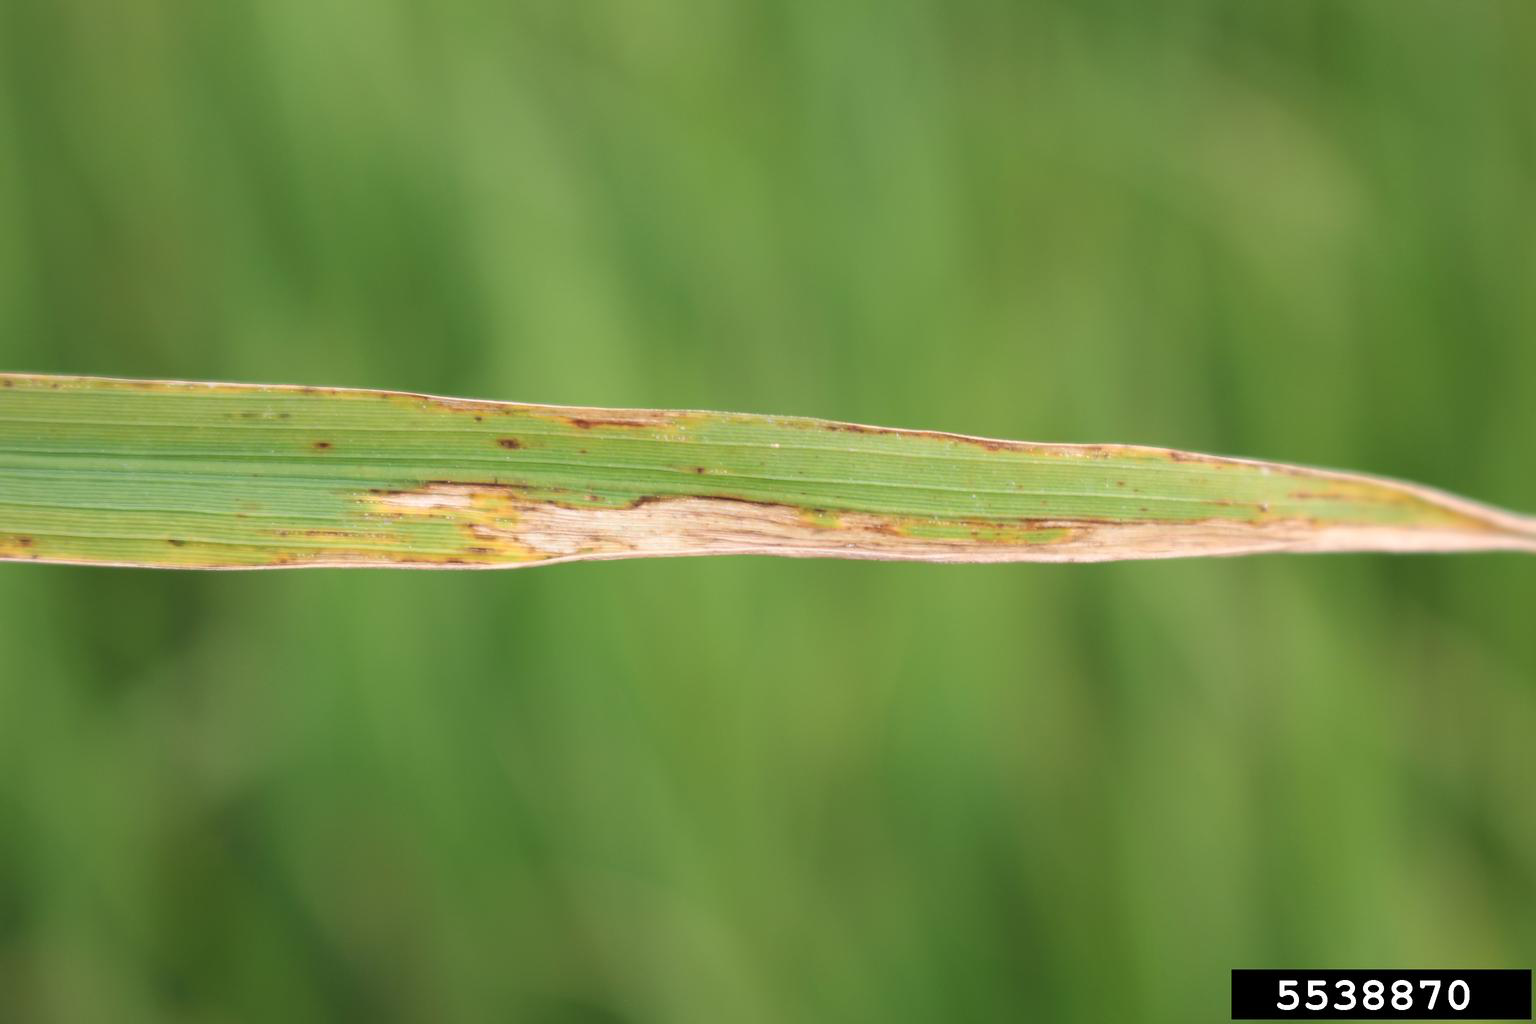

In [104]:
image_name5='leaf_blight3.jpg'
img5 = load_img(image_name5)
x5 = img_to_array(img5.resize([250,250]))
x5 = x5.reshape((1,) + x5.shape)
img5

In [105]:
print(model.predict(x5))

[[3.2513657e-34 5.4721505e-17 1.0000000e+00]]


In [107]:
print(np.argmax(model.predict(x5)))

2
